In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

from acquire import get_titanic_data
from prepare import prep_titanic
from splitter import splitter

# I. Titanic Data - Decision Tree

In [62]:
df = get_titanic_data()
df.head(2)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0


In [63]:
df = prep_titanic(df)
df.drop(columns='age', inplace=True)
df.head(2)

,survived,pclass,Siblings/Spouses,Parents/Children,fare,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,3,1,0,7.2500,0,1,0,1
1,1,1,1,0,71.2833,0,0,0,0


## 1. What is your baseline prediction?  Baseline accuracy?

In [64]:
df_train, df_validate, df_test = splitter(df, 'survived')
df_train.survived.value_counts()

0    307
1    191
Name: survived, dtype: int64

In [65]:
307/(307+191)

0.6164658634538153

#### Baseline prediction is died, which is accurate 61.65% of the time.

## 2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)

In [66]:
X_train = df_train.drop(columns=['survived'])
y_train = df_train.survived

X_validate = df_validate.drop(columns=['survived'])
y_validate = df_validate.survived

X_test = df_test.drop(columns=['survived'])
y_test = df_test.survived

In [74]:
clf = DecisionTreeClassifier(max_depth=3, random_state=123)
clf = clf.fit(X_train, y_train)
# this is tpyiall where y_pred = clf.predict(X_train) would live as part of the "3 lines of code"

[Text(446.4, 380.52, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]\nclass = 0'),
 Text(223.2, 271.8, 'pclass <= 2.5\ngini = 0.365\nsamples = 175\nvalue = [42, 133]\nclass = 1'),
 Text(111.6, 163.07999999999998, 'fare <= 28.856\ngini = 0.081\nsamples = 94\nvalue = [4, 90]\nclass = 1'),
 Text(55.8, 54.360000000000014, 'gini = 0.133\nsamples = 42\nvalue = [3, 39]\nclass = 1'),
 Text(167.39999999999998, 54.360000000000014, 'gini = 0.038\nsamples = 52\nvalue = [1, 51]\nclass = 1'),
 Text(334.79999999999995, 163.07999999999998, 'fare <= 23.912\ngini = 0.498\nsamples = 81\nvalue = [38, 43]\nclass = 1'),
 Text(279.0, 54.360000000000014, 'gini = 0.476\nsamples = 69\nvalue = [27, 42]\nclass = 1'),
 Text(390.59999999999997, 54.360000000000014, 'gini = 0.153\nsamples = 12\nvalue = [11, 1]\nclass = 0'),
 Text(669.5999999999999, 271.8, 'fare <= 18.275\ngini = 0.295\nsamples = 323\nvalue = [265, 58]\nclass = 0'),
 Text(558.0, 163.07999999999998, 'Parents/Children <= 0.5\ngini = 0.

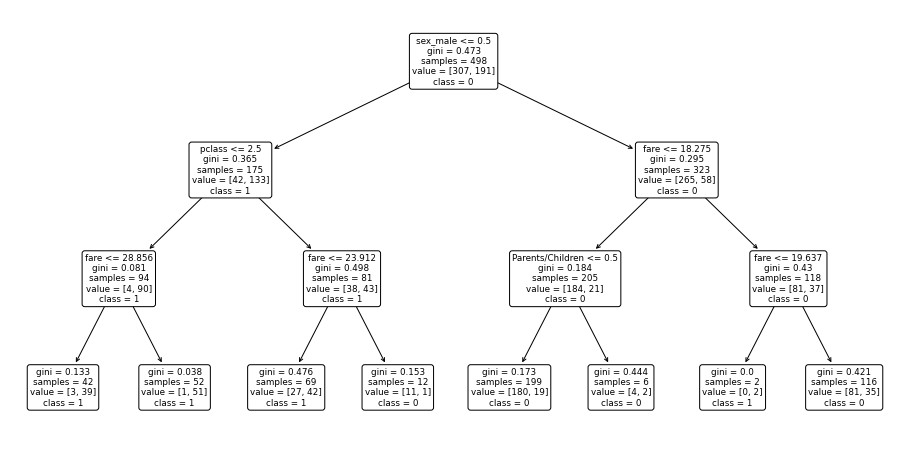

In [75]:
# plotting figure unecessary but good for funsies or stakeholder visuals at times
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

## 3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.

In [76]:
y_pred = clf.predict(X_train)
y_pred[10:15]

array([1, 0, 1, 0, 0])

In [77]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[10:15]

array([[0.39130435, 0.60869565],
       [0.69827586, 0.30172414],
       [0.07142857, 0.92857143],
       [0.69827586, 0.30172414],
       [0.69827586, 0.30172414]])

In [ ]:
# unecessary/redundant - found in dataframe you create below already
confusion_matrix(y_train, y_pred)

In [78]:
pd.DataFrame(confusion_matrix(y_train, y_pred), index=['died','survived'], columns=['died','survived'])

,died,survived
died,276,31
survived,57,134


## 4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

##### In sample:

In [79]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.82


In [81]:
report = classification_report(y_train, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       307
           1       0.81      0.70      0.75       191

    accuracy                           0.82       498
   macro avg       0.82      0.80      0.81       498
weighted avg       0.82      0.82      0.82       498



##### Validate:

In [83]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validate set: 0.79


In [84]:
y_pred = clf.predict(X_validate)

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       132
           1       0.76      0.65      0.70        82

    accuracy                           0.79       214
   macro avg       0.78      0.76      0.77       214
weighted avg       0.78      0.79      0.78       214



In [ ]:
# Make function that creates a fun and pretty table when you have time.

## 5. Run through steps 2-4 using a different max_depth value.

### Using max_depth = 7:

##### Train:

In [90]:
clf = DecisionTreeClassifier(max_depth=7, random_state=123)
clf = clf.fit(X_train, y_train)

In [ ]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [91]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.86


In [92]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90       307
           1       0.95      0.68      0.79       191

    accuracy                           0.86       498
   macro avg       0.89      0.83      0.85       498
weighted avg       0.88      0.86      0.86       498



##### Validate:

In [93]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validation set: 0.76


In [94]:
y_pred = clf.predict(X_validate)

print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       132
           1       0.77      0.54      0.63        82

    accuracy                           0.76       214
   macro avg       0.76      0.72      0.73       214
weighted avg       0.76      0.76      0.75       214



## 6. Which model performs better on your in-sample data?

The max_steps = 7 is better on in-sample data (as expected, more granular).

## 7. Which model performs best on your out-of-sample data, the validate set?

The max_steps = 3 is better on the validate data.

# II. Telco Data - Decision Tree

In [2]:
from acquire import get_telco_data
from prepare import prep_telco

In [3]:
df = get_telco_data()
df.head(2)

,internet_service_type_id,customer_id,contract_type_id,paperless_billing,contract_type,payment_type_id,monthly_charges,total_charges,gender,senior_citizen,...,tech_support,streaming_tv,streaming_movies,contract_type_id.1,paperless_billing.1,payment_type_id.1,monthly_charges.1,total_charges.1,churn,internet_service_type
0,2,0004-TLHLJ,1,Yes,Month-to-month,1,73.9,280.85,Male,0,...,No,No,No,1,Yes,1,73.9,280.85,Yes,Fiber optic
1,1,0017-DINOC,3,No,Two year,4,45.2,2460.55,Male,0,...,Yes,Yes,No,3,No,4,45.2,2460.55,No,DSL


In [4]:
df = prep_telco(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 44 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   paperless_billing                      7032 non-null   object 
 1   contract_type                          7032 non-null   object 
 2   monthly_charges                        7032 non-null   float64
 3   total_charges                          7032 non-null   float64
 4   gender                                 7032 non-null   object 
 5   senior_citizen                         7032 non-null   int64  
 6   partner                                7032 non-null   object 
 7   dependents                             7032 non-null   object 
 8   tenure                                 7032 non-null   int64  
 9   phone_service                          7032 non-null   object 
 10  multiple_lines                         7032 non-null   object 
 11  onli

In [5]:
dropcols = [col for col in df.columns if df[col].dtype == 'object']
dropcols.remove('churn')
dropcols.append('churn_encoded')
dropcols

['paperless_billing',
 'contract_type',
 'gender',
 'partner',
 'dependents',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'internet_service_type',
 'churn_encoded']

In [6]:
df = df.drop(columns=dropcols)
df.head(2)

,monthly_charges,total_charges,senior_citizen,tenure,contract_type_id.1,churn,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,...,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None
0,73.9,280.85,0,4,1,Yes,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,45.2,2460.55,0,54,3,No,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0


In [7]:
df_train, df_validate, df_test = splitter(df, 'churn')
df_train.churn.value_counts()

No     2891
Yes    1046
Name: churn, dtype: int64

In [8]:
#Note: Work more on establishing the baseline with code.  Esp since often a categorical!
2891/(2891+1046)

0.7343154686309372

#### Baseline case is 'not churned' and the baseline accuracy is 73.43%.

In [9]:
#Note - you can also drop all the columns in X-data, including churn, in the drop(columns)
# The way you did it here was redundant!
X_train = df_train.drop(columns=['churn'])
y_train = df_train.churn

X_validate = df_validate.drop(columns=['churn'])
y_validate = df_validate.churn

X_test = df_test.drop(columns=['churn'])
y_test = df_test.churn

In [10]:
clf = DecisionTreeClassifier(max_depth = 3, random_state=123)
clf = clf.fit(X_train, y_train)

[Text(446.4, 380.52, 'contract_type_id.1 <= 1.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = No'),
 Text(223.2, 271.8, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.49\nsamples = 2161\nvalue = [1233, 928]\nclass = No'),
 Text(111.6, 163.07999999999998, 'tenure <= 5.5\ngini = 0.409\nsamples = 954\nvalue = [681, 273]\nclass = No'),
 Text(55.8, 54.360000000000014, 'gini = 0.497\nsamples = 401\nvalue = [217, 184]\nclass = No'),
 Text(167.39999999999998, 54.360000000000014, 'gini = 0.27\nsamples = 553\nvalue = [464, 89]\nclass = No'),
 Text(334.79999999999995, 163.07999999999998, 'total_charges <= 1163.45\ngini = 0.496\nsamples = 1207\nvalue = [552, 655]\nclass = Yes'),
 Text(279.0, 54.360000000000014, 'gini = 0.416\nsamples = 543\nvalue = [160, 383]\nclass = Yes'),
 Text(390.59999999999997, 54.360000000000014, 'gini = 0.484\nsamples = 664\nvalue = [392, 272]\nclass = No'),
 Text(669.5999999999999, 271.8, 'monthly_charges <= 99.95\ngini = 0.124\nsamples = 1776\nvalue = 

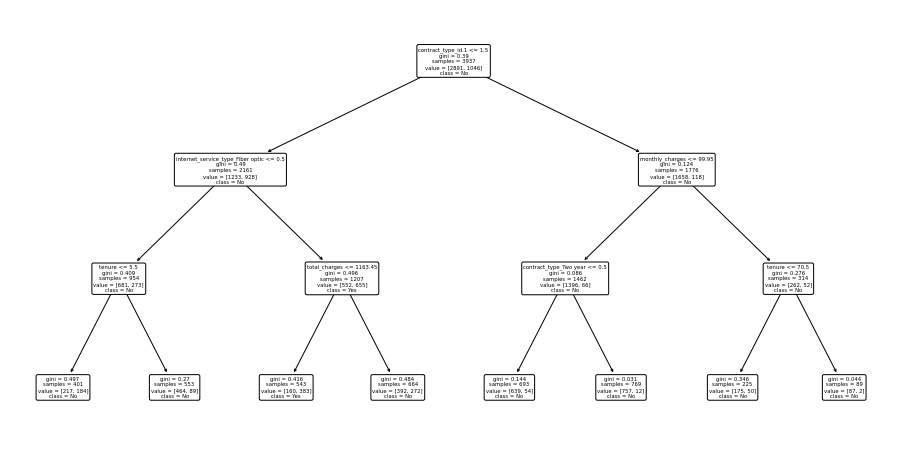

In [11]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [12]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['No', 'Yes', 'No', 'Yes', 'No'], dtype=object)

In [13]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.59036145, 0.40963855],
       [0.2946593 , 0.7053407 ],
       [0.92207792, 0.07792208],
       [0.2946593 , 0.7053407 ],
       [0.77777778, 0.22222222]])

In [14]:
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,No,Yes
No,2731,160
Yes,663,383


##### In training sample:

In [15]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.79


In [16]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.80      0.94      0.87      2891
         Yes       0.71      0.37      0.48      1046

    accuracy                           0.79      3937
   macro avg       0.75      0.66      0.68      3937
weighted avg       0.78      0.79      0.77      3937



##### In validation sample:

In [18]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validation set: 0.79


In [19]:
y_pred = clf.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

          No       0.80      0.95      0.87      1239
         Yes       0.71      0.37      0.48       449

    accuracy                           0.79      1688
   macro avg       0.76      0.66      0.68      1688
weighted avg       0.78      0.79      0.77      1688



### Using max_depth = 7

In [47]:
clf = DecisionTreeClassifier(max_depth = 7, random_state=123)
clf = clf.fit(X_train, y_train)

[Text(502.052380952381, 407.7, 'contract_type_id.1 <= 1.5\ngini = 0.39\nsamples = 3937\nvalue = [2891, 1046]\nclass = No'),
 Text(271.0285714285714, 353.34000000000003, 'internet_service_type_Fiber optic <= 0.5\ngini = 0.49\nsamples = 2161\nvalue = [1233, 928]\nclass = No'),
 Text(147.61904761904762, 298.98, 'tenure <= 5.5\ngini = 0.409\nsamples = 954\nvalue = [681, 273]\nclass = No'),
 Text(75.58095238095238, 244.62, 'device_protection_No internet service <= 0.5\ngini = 0.497\nsamples = 401\nvalue = [217, 184]\nclass = No'),
 Text(37.79047619047619, 190.26, 'total_charges <= 109.1\ngini = 0.492\nsamples = 250\nvalue = [109, 141]\nclass = Yes'),
 Text(18.895238095238096, 135.89999999999998, 'multiple_lines_No phone service <= 0.5\ngini = 0.458\nsamples = 149\nvalue = [53, 96]\nclass = Yes'),
 Text(9.447619047619048, 81.54000000000002, 'monthly_charges <= 45.625\ngini = 0.485\nsamples = 97\nvalue = [40, 57]\nclass = Yes'),
 Text(4.723809523809524, 27.180000000000007, 'gini = 0.493\nsamp

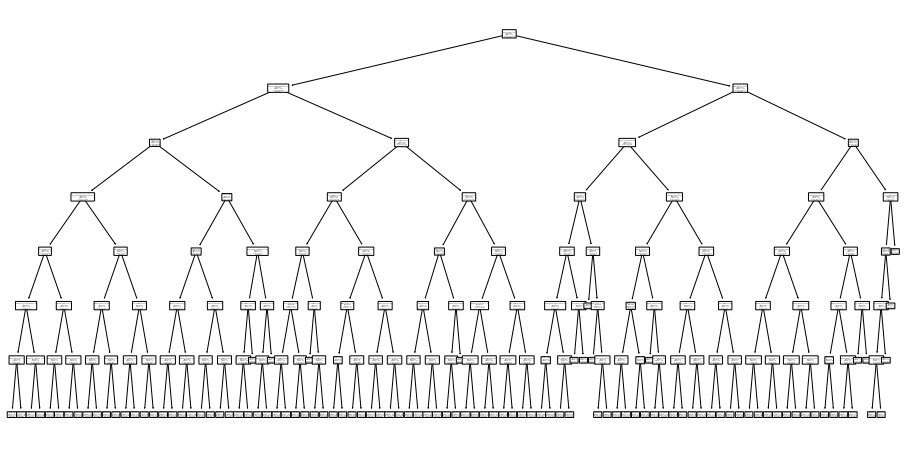

In [48]:
plt.figure(figsize=(16, 8))
plot_tree(clf, feature_names=X_train.columns, class_names=clf.classes_.astype(str), rounded=True)

In [49]:
y_pred = clf.predict(X_train)
y_pred[0:5]

array(['No', 'Yes', 'No', 'No', 'No'], dtype=object)

In [50]:
y_pred_proba = clf.predict_proba(X_train)
y_pred_proba[0:5]

array([[0.53246753, 0.46753247],
       [0.45544554, 0.54455446],
       [1.        , 0.        ],
       [0.72727273, 0.27272727],
       [0.76712329, 0.23287671]])

In [51]:
labels = sorted(y_train.unique())
pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

,No,Yes
No,2648,243
Yes,406,640


##### In training sample:

In [52]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))

Accuracy of Decision Tree classifier on training set: 0.84


In [53]:
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89      2891
         Yes       0.72      0.61      0.66      1046

    accuracy                           0.84      3937
   macro avg       0.80      0.76      0.78      3937
weighted avg       0.83      0.84      0.83      3937



##### In validation sample:

In [54]:
print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Accuracy of Decision Tree classifier on validation set: 0.77


In [55]:
y_pred = clf.predict(X_validate)
print(classification_report(y_validate, y_pred))

              precision    recall  f1-score   support

          No       0.83      0.87      0.85      1239
         Yes       0.58      0.51      0.54       449

    accuracy                           0.77      1688
   macro avg       0.70      0.69      0.69      1688
weighted avg       0.76      0.77      0.76      1688



### Comparison at different max levels:

In [97]:
for i in range(1,9):
    clf = DecisionTreeClassifier(max_depth = i, random_state=123)
    clf = clf.fit(X_train, y_train)
    print(f'Depth = {i}')
    print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on validation set: {:.2f}'
      .format(clf.score(X_validate, y_validate)))

Depth = 1
Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on validation set: 0.76
Depth = 2
Accuracy of Decision Tree classifier on training set: 0.80
Accuracy of Decision Tree classifier on validation set: 0.76
Depth = 3
Accuracy of Decision Tree classifier on training set: 0.82
Accuracy of Decision Tree classifier on validation set: 0.79
Depth = 4
Accuracy of Decision Tree classifier on training set: 0.83
Accuracy of Decision Tree classifier on validation set: 0.79
Depth = 5
Accuracy of Decision Tree classifier on training set: 0.84
Accuracy of Decision Tree classifier on validation set: 0.76
Depth = 6
Accuracy of Decision Tree classifier on training set: 0.86
Accuracy of Decision Tree classifier on validation set: 0.77
Depth = 7
Accuracy of Decision Tree classifier on training set: 0.86
Accuracy of Decision Tree classifier on validation set: 0.76
Depth = 8
Accuracy of Decision Tree classifier on training set: 0.90
Accuracy of Decision 

#### Model performs best on validation set at a Depth of 3.

In [ ]:
# Note: Remember you are not necessarily optimizing for accuracy, could be looking at recall or precision (or even F1)
# A good way to assess train v. validation is by minimizing the distance between the outcome of interest

# III. Titanic Data - Random Forest

In [ ]:
#Before tomorrow - 
#(1) figure out the format of the matrix results function by checking against the results from the classificaiton report
#(2) creat the loops!

## 1. Fit the Random Forest classifier to your training sample and transform (i.e. make predictions on the training sample) setting the random_state accordingly and setting min_samples_leaf = 1 and max_depth = 10.

In [146]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=10, 
                            min_samples_leaf = 1,
                            random_state=123)

In [147]:
rf = rf.fit(X_train, y_train)

In [148]:
print(X_train.columns)
print(rf.feature_importances_)

Index(['pclass', 'Siblings/Spouses', 'Parents/Children', 'fare', 'alone',
       'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')
[0.10004896 0.06919781 0.05286698 0.38308923 0.02330269 0.32808955
 0.01527994 0.02812485]


## 2. Evaluate your results using the model score, confusion matrix, and classification report.

### Training data:

In [173]:
labels = sorted(y_train.unique())
y_pred = rf.predict(X_train)
dfrftr = pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)
dfrftr

,0,1
0,259,48
1,55,136


In [150]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.94


In [151]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       307
           1       0.97      0.88      0.92       191

    accuracy                           0.94       498
   macro avg       0.95      0.93      0.94       498
weighted avg       0.94      0.94      0.94       498



### Validation Data:

In [152]:
rf = RandomForestClassifier(max_depth=10, 
                            min_samples_leaf = 1,
                            random_state=123)

In [153]:
rf_validate = rf.fit(X_validate, y_validate)

In [154]:
print(X_validate.columns)
print(rf_validate.feature_importances_)

Index(['pclass', 'Siblings/Spouses', 'Parents/Children', 'fare', 'alone',
       'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')
[0.09331868 0.06068313 0.08597751 0.446096   0.02735601 0.22400047
 0.01518811 0.04738008]


In [155]:
y_pred_validate = rf_validate.predict(X_validate)
dfrfv = pd.DataFrame(confusion_matrix(y_validate, y_pred_validate), index=labels, columns=labels)
dfrfv

,No,Yes
No,127,5
Yes,10,72


In [156]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf_validate.score(X_validate, y_validate)))

Accuracy of random forest classifier on training set: 0.93


In [157]:
print(classification_report(y_validate, y_pred_validate))

              precision    recall  f1-score   support

           0       0.93      0.96      0.94       132
           1       0.94      0.88      0.91        82

    accuracy                           0.93       214
   macro avg       0.93      0.92      0.92       214
weighted avg       0.93      0.93      0.93       214



##### Great models!

## 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [172]:
def matrix_results(df, TP='NW', actual='rows'):
    if TP=='NW':
        if actual=='rows':
            true_positive = df.iloc[0,0]
            false_positive = df.iloc[1,0]
            true_negative = df.iloc[1,1]
            false_negative = df.iloc[0,1]
        elif actual=='columns':
            true_positive = df.iloc[0,0]
            false_positive = df.iloc[0,1]
            true_negative = df.iloc[1,1]
            false_negative = df.iloc[1,0]
        else:
            print('''If actual results (from training data) is in columns, please include "actual = 'columns'" in the function parameters''')
            return
    elif TP=='SE':
        if actual=='rows':
            true_positive = df.iloc[1,1]
            false_positive = df.iloc[0,1]
            true_negative = df.iloc[0,0]
            false_negative = df.iloc[1,0]
        elif actual=='columns':
            true_positive = df.iloc[1,1]
            false_positive = df.iloc[1,0]
            true_negative = df.iloc[0,0]
            false_negative = df.iloc[0,1]
        else:
            print('''If actual results (from training data) is in columns, please include " actual = 'columns' " in the function parameters''')
            return
    else:
        print('''If True Positive is in the bottom right quadrant, please include " TP = 'SE' " in the function parameters''')
        return
    precision = true_positive / (true_positive + false_positive)
    recall = true_positive / (true_positive + false_negative)
    accuracy = (true_positive + true_negative) / (true_positive + true_negative + false_positive + false_negative)
    f1_score = (2*precision*recall)/(precision + recall)
    print(f'True Positive = {true_positive}')
    print(f'False Positive = {false_positive}')
    print(f'True Negative = {true_negative}')
    print(f'False Negative = {false_negative}')
    print(f'Precision = {precision:.2f}')
    print(f'Recall = {recall:.2f}')
    print(f'Accuracy = {accuracy:.2f}')
    print(f'F1 Score = {f1_score:.2f}')

In [169]:
print('Training Data Results:')
matrix_results(dfrftr)
print('\n----------\n')
print('Validation Data Results:')
matrix_results(dfrfv)

Training Data Results:
True Positive = 169
False Positive = 6
True Negative = 301
False Negative = 22
Precision = 0.97
Recall = 0.88
Accuracy = 0.94
F1 Score = 0.92

----------

Validation Data Results:
True Positive = 72
False Positive = 5
True Negative = 127
False Negative = 10
Precision = 0.94
Recall = 0.88
Accuracy = 0.93
F1 Score = 0.91


## 4. Run through steps increasing your min_samples_leaf and decreasing your max_depth.

In [126]:
for i in range(10,0,-1):
    for j in range(1,10)
        rf = RandomForestClassifier(max_depth=i, min_samples_leaf = j,random_state=123)
        rf_train = rf.fit(X_train, y_train)
        y_pred = rf_train.predict(X_train)

In [130]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf.score(X_train, y_train)))

Accuracy of random forest classifier on training set: 0.88


In [131]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91       307
           1       0.91      0.75      0.83       191

    accuracy                           0.88       498
   macro avg       0.89      0.85      0.87       498
weighted avg       0.88      0.88      0.87       498



### Validation Data:

In [132]:
rf = RandomForestClassifier(max_depth=7, 
                            min_samples_leaf = 3,
                            random_state=123)

In [133]:
rf_validate = rf.fit(X_validate, y_validate)

In [134]:
print(X_validate.columns)
print(rf_validate.feature_importances_)

Index(['pclass', 'Siblings/Spouses', 'Parents/Children', 'fare', 'alone',
       'sex_male', 'embark_town_Queenstown', 'embark_town_Southampton'],
      dtype='object')
[0.12722947 0.04934792 0.06655352 0.33002656 0.04188238 0.33171639
 0.01291727 0.04032649]


In [135]:
y_pred_validate = rf_validate.predict(X_validate)
pd.DataFrame(confusion_matrix(y_validate, y_pred_validate), index=labels, columns=labels)

,No,Yes
No,123,9
Yes,21,61


In [136]:
print('Accuracy of random forest classifier on training set: {:.2f}'
     .format(rf_validate.score(X_validate, y_validate)))

Accuracy of random forest classifier on training set: 0.86


In [137]:
print(classification_report(y_validate, y_pred_validate))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       132
           1       0.87      0.74      0.80        82

    accuracy                           0.86       214
   macro avg       0.86      0.84      0.85       214
weighted avg       0.86      0.86      0.86       214



## 5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?